In [17]:
system = mda.Universe('../input/SYSTEM.pdb', f'lambda-1.000/traj000000001.dcd')
no_close_waters = []
lig_atom = system.select_atoms("index 5193")
protein_atom = system.select_atoms("index 4916")
no_frames_to_use = int(round(len(system.trajectory)*(100/100),0))
for frame in range(no_frames_to_use):
    system.trajectory[frame]
    no_close_waters.append(dist(lig_atom, protein_atom)[2])
    avg_distance = sum(no_close_waters)/len(no_close_waters)
print(round(avg_distance[0]),2)

33 2


In [71]:
print(system.select_atoms("index 4881"))

<AtomGroup [<Atom 4882: OH of type O of resname TYR, resid 323 and segid SYSTEM and altLoc >]>


In [21]:
from MDAnalysis.analysis.distances import dist
import matplotlib.pyplot as plt
import os
import sys
import MDAnalysis as mda
import numpy as np

def calcuate_avg_dist(lam_val, percent_frames):
    """A function to calculate the average distance of the phenolic 
       O in MIF 180 to the carbonyl O of ASN 97 over a trajectory,
       averaging over the specified percentage of frames

    Args:
        lam_val (str)
        percent_frames (str)

    Returns:
        float: The average distance of the ligand and proteins O atoms
        over the specified percent of the trajectory
    """ 
    system = mda.Universe('../input/SYSTEM.pdb', f'lambda-{lam_val}/traj000000001.dcd')
    distances = []
    avg_distance=0
    no_frames_to_use = int(round(len(system.trajectory)*(percent_frames/100),0))
    lig_atom = system.select_atoms("index 5193")
    protein_atom = system.select_atoms("index 4916")
    for frame in range(no_frames_to_use):
        system.trajectory[frame]
        distances.append(dist(lig_atom, protein_atom)[2])
        avg_distance = sum(distances)/len(distances)
    return round(avg_distance[0], 3)


# Define lambda values
lam_folders = [x for x in os.listdir() if 'lambda' in x]
lam_folders.sort()
lam_vals = [x[-5:] for x in lam_folders]

# Specify list of percentages to use
percents = [10 + 10*x for x in range(10)]

# Calculate average number of waters within 5 A of selected residue
# of time percentages
avg_distance_with_time = []
for percent in percents:
    avg_distance = []
    for lam_val in lam_vals:
        avg_distance.append(calcuate_avg_dist(lam_val,percent))
    avg_distance_with_time.append(avg_distance)


#for i in range(no_windows):

/home/finlayclark/anaconda3/envs/biosimspace-dev/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


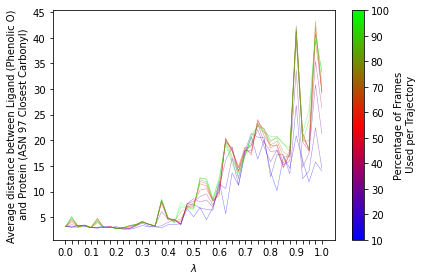

In [23]:
import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=10, vmax=100, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)

fig, ax = plt.subplots()
fig.colorbar(mapper).set_label('Percentage of Frames\n Used per Trajectory')
for i in range(len(percents)):
    ax.plot(lam_vals, avg_distance_with_time[i], c=mapper.to_rgba(percents[i]), alpha=0.5, lw=0.5)
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel('Average distance between Ligand (Phenolic O)\n and Protein (ASN 97 Closest Carbonyl)')

rounded_lam_vals =  [round(float(x),2) for x in lam_vals]

ax.set_xticklabels(rounded_lam_vals)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.tight_layout()
fig.savefig('avg_lig_prot_distance.png', dpi=1000, facecolor='w')